In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
ds=pd.read_csv('House_Data.csv')

In [3]:
ds.shape

(13320, 9)

In [4]:
ds.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
ds.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
ds.isna().sum()



area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data2=ds.drop(['area_type','availability','society','balcony'],axis=1)

In [8]:
data2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
data3=data2.dropna()
data3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
data3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
data3['bhk']=data3['size'].apply(lambda x: int(x.split()[0]))

C:\Users\vaisa\AppData\Local\Temp\ipykernel_11956\1302895582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk']=data3['size'].apply(lambda x: int(x.split()[0]))


In [13]:
data3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
data3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
data3[data3.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [16]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def check_val(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [18]:
data3[~data3.total_sqft.apply(check_val)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def handle_ranges(x):
    tokens=x.split('-')
    if len(tokens)==2:
        output=(float(tokens[0])+float(tokens[1]))/2
        return output
    try:
        return float(x)
    except:
        return None

In [20]:
data4=data3.copy()
data4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [21]:
data4['total_sqft']=data4['total_sqft'].apply(handle_ranges)
data4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [22]:
data5=data4.copy()

In [23]:
data5['pricesq']=data5['price']*10000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,pricesq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [24]:
len(data5.location.unique()) #No of unique values

1304

In [25]:
data5['location']=data5['location'].apply(lambda x:x.strip())

In [26]:
insights_locations=data5['location'].value_counts(ascending=False)

In [27]:
insights_locations

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
West of Chord Road                  1
Ganganahalli                        1
Whitefield ECC Road                 1
Bharath Housing Society Layout      1
Chikkaballapur                      1
Name: location, Length: 1293, dtype: int64

In [28]:
len(insights_locations[insights_locations>10])

241

In [29]:
locations_lessthan10=insights_locations[insights_locations<=10]

In [30]:
locations_lessthan10

Dairy Circle                      10
Naganathapura                     10
Sector 1 HSR Layout               10
Ganga Nagar                       10
Kalkere                           10
                                  ..
West of Chord Road                 1
Ganganahalli                       1
Whitefield ECC Road                1
Bharath Housing Society Layout     1
Chikkaballapur                     1
Name: location, Length: 1052, dtype: int64

In [31]:
data5.location=data5.location.apply(lambda x:'other' if x in locations_lessthan10 else x)

In [32]:
data5

,location,size,total_sqft,bath,price,bhk,pricesq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,668.983493
13316,other,4 BHK,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,1040.733632


In [33]:
#Outlier Detection

data5.head()

,location,size,total_sqft,bath,price,bhk,pricesq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [34]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12502, 7)

In [35]:
data6.pricesq.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: pricesq, dtype: float64

In [36]:
x = data6.groupby('location').sum()
x

,total_sqft,bath,price,bhk,pricesq
location,,,,,
1st Block Jayanagar,19150.00,31.0,2541.000,32,1.235925e+04
1st Phase JP Nagar,41416.00,71.0,4027.500,69,2.237073e+04
2nd Phase Judicial Layout,12906.00,23.0,508.000,27,4.453571e+03
2nd Stage Nagarbhavi,19150.00,42.0,2431.000,41,1.294315e+04
5th Block Hbr Layout,14788.00,22.0,878.000,24,4.635484e+03
...,...,...,...,...,...
Yelahanka,364088.50,504.0,17248.285,515,1.067003e+05
Yelahanka New Town,46190.00,73.0,3404.500,81,2.227051e+04
Yelenahalli,16490.00,28.0,660.390,29,5.216316e+03


In [37]:
def outliers_rm_price_sqft(data):
    data_to_return = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        mean = np.mean(subdata.pricesq)
        stdv = np.std(subdata.pricesq)
        reduced_data = subdata[(subdata.pricesq>(mean-stdv)) & (subdata.pricesq<=(mean+stdv))]
        data_to_return = pd.concat([data_to_return,reduced_data],ignore_index=True)
    return data_to_return


In [38]:
data7 = outliers_rm_price_sqft(data6)
data7

,location,size,total_sqft,bath,price,bhk,pricesq
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,1198.380567
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,813.008130
10237,other,1 Bedroom,812.0,1.0,26.00,1,320.197044
10238,other,3 BHK,1440.0,2.0,63.93,3,443.958333
10239,other,2 BHK,1075.0,2.0,48.00,2,446.511628


In [39]:
data7.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
pricesq       0
dtype: int64

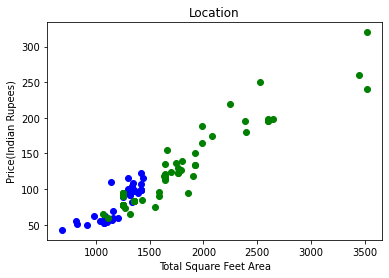

In [40]:
def scatterplot(data,location):
    bhk_2=data[(data.location==location)&(data.bhk==2)]
    bhk_3=data[(data.location==location)&(data.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label='2 BHK')
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color='green',label='3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price(Indian Rupees)")
    plt.title("Location")
    plt.show()
    
scatterplot(data7,"Hebbal")


In [41]:
def ter_outliers_bhk(data):
    rem_indices=np.array([])
    for location,location_data in data.groupby('location'):
            BHK_stats={}
            for bhk,bhk_data in location_data.groupby('bhk'):
                BHK_stats[bhk]={
                    'mean':np.mean(bhk_data.pricesq),
                     'std':np.std(bhk_data.pricesq),
                    'count':bhk_data.shape[0]

                    }
            for bhK,bhk_data in location_data.groupby('bhk'):
                stat_bhk=BHK_stats.get(bhk-1)
                if stat_bhk and stat_bhk['count']>5:
                    rem_indices=np.append(rem_indices,bhk_data[bhk_data.pricesq<(stat_bhk['mean'])].index.values)
    return data.drop(rem_indices,axis='index')

In [42]:
data8=ter_outliers_bhk(data7)
data8.shape

(7464, 7)

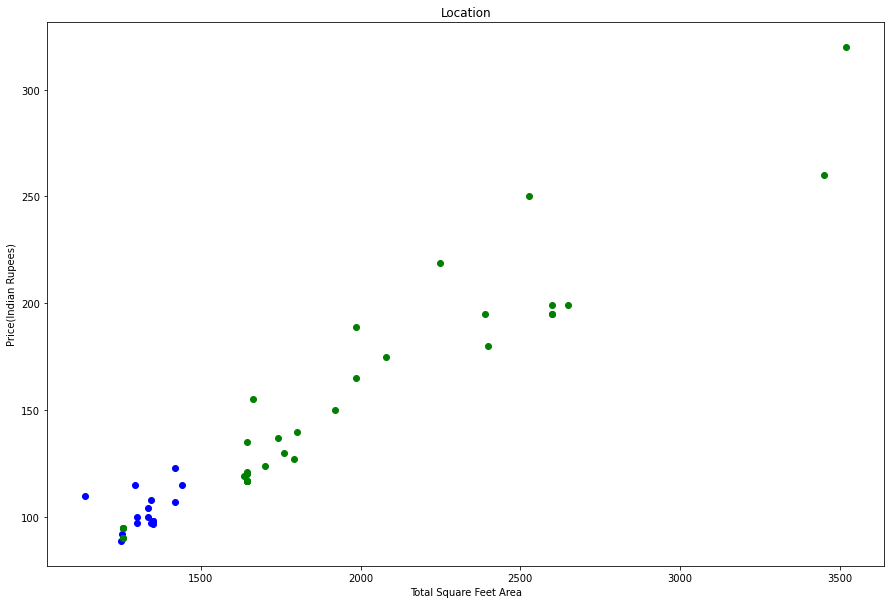

In [43]:
scatterplot(data8,"Hebbal")

In [44]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,bhk,pricesq
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8575,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,506.912442


In [46]:
data8[data8.bath>data8.bhk+2]

,location,size,total_sqft,bath,price,bhk,pricesq
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8411,other,6 BHK,11338.0,9.0,1000.0,6,881.989769


In [47]:
data9=data8[data8.bath<data8.bhk+2]
data9.shape

(7381, 7)

In [48]:
data9=data9.drop(['size','pricesq'],axis=1)
data9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2
10237,other,812.0,1.0,26.00,1
10238,other,1440.0,2.0,63.93,3
10239,other,1075.0,2.0,48.00,2


In [49]:
import pickle

dummy_set=pd.get_dummies(data9.location)

loc_in = {}

for i, x in enumerate(data9['location'].unique()):
    loc_in[x] = i
    
del loc_in['other']

with open('loc_in.pkl','wb') as f: 
    pickle.dump(loc_in, f);

In [50]:
data10=pd.concat([data9,dummy_set.drop('other',axis=1)],axis=1)

In [51]:
# you are dropping location other

In [52]:
data10

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,1440.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,other,1075.0,2.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data11=data10.drop('location',axis=1)

In [54]:
data11 #Cleaned Dataset

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1353.0,2.0,110.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x=data11.drop('price',axis=1)
y=data11['price']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

def find_best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },  
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.1,random_state=222529)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv)
        gs=gs.fit(x, y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [59]:
find_best_model(x,y)

C:\Users\vaisa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\vaisa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

,model,best_score,best_params
0,linear_regression,0.792076,{'normalize': True}
1,lasso,0.657230,"{'alpha': 1, 'selection': 'random'}"


In [60]:
HS2=LinearRegression()
HS2.fit(x, y)

with open('House_predictor.pickle', 'wb') as f:
    pickle.dump(HS2, f)

In [61]:
def predict_price(location,sqft,bath,bhk):
    pickle_in=open('House_predictor.pickle','rb')
    HS2=pickle.load(pickle_in)
    loc_index=np.where(x.columns==location)[0][0]
    px=np.zeros(len(x.columns))
  
    px[0]=sqft
    px[1]=bath
    px[2]=bhk
    if loc_index>=0:
        px[loc_index]=1
        
    return HS2.predict([px])[0]

In [62]:
predict_price('1st Block Jayanagar',1000,1,1) 

C:\Users\vaisa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


199.5277064334654